# Classification and Regression using Decision Trees

This notebook walks you through two examples using Decision Trees, one for classification, and the other for regression. We will implement Decision Trees using Scikit-Learn. We will also use the Graphviz package to visualize the decision trees, which has proven to be a very useful way of understanding how Decision Trees work. <br>
<br>
Author: Jiajia Sun @ University of Houston, 02/21/2019

## 1. Classification of Iris flowers
We will use the famour Iris data set as an example to illustrate how to implement Decision Trees in Scikit-Learn.

### 1.1. Import Scikit-Learn packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

### 1.2 Get the training data ready
For this demo, we are going to use only two features, petal length and width measurements, to classify the Iris flowers.

In [2]:
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

### 1.3 Set up the classifier
Now, we need to specify what kind of decision trees we want to have. For example, how many depths (i.e., max_depth)? What is the minimum number of samples that a leaf node must have (i.e., min_samples_leaf)? These are called hyperparameters; they impose different constraints on the learning process. Note that they are NOT the model parameters that a machine learning algorithm tries to learn during training. Hyperparameters are set before the learning (or training) takes place. 

In [3]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

In the above example, I set max_depth = 2. Please feell free to try different values.

### 1.4 Training
This is probably the simplest part, because all you need to do is run the code **name_of_my_classifier<font color=red>.fit</font>** followed by your training data with labels.

In [4]:
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

### 1.5 Visualization
This helps us actually see the decision tree that our algorithm just trained using Iris data set.

In [5]:
import graphviz
dot_data = export_graphviz(tree_clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

Altenatively, the *export_graphviz* exporter also supports a variety of aesthetic options, including coloring nodes by their class (or value for regression) and using explicit variable and class names if desired. Jupyter notebooks also render these plots inline automatically:

In [6]:
dot_data = export_graphviz(tree_clf, out_file=None, 
                         feature_names=iris.feature_names[2:],  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  


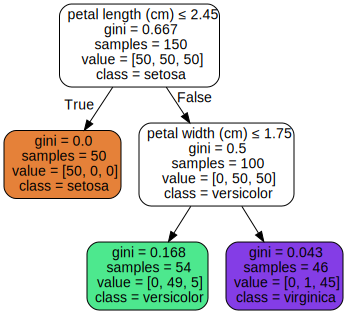

In [7]:
graph

Great! This is the actual tree that you just trained using **<font color=red>.fit(X,y)</font>**.

### Note
For this notebook, we are only interested in how to train a decision tree using Scikit-learn package. Therefore, I did not split the entire Iris dataset into training and validation sets. For practical ML problems, you always should split your data into at least two sets: training and validation sets, and ideally, three sets: training, validation and testing sets.

## 2. Regression
As we discussed in class, Decision Trees are also capable of performing regression tasks. Next, let us first generate a synthetic set of data and then perform a regression using Decision Trees.

### 2.1 Generate synthetic data

Text(0,0.5,'$y$')

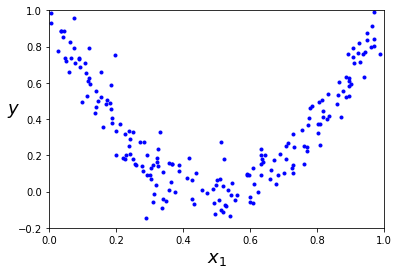

In [8]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

plt.plot(X,y,'b.')
plt.axis([0, 1, -0.2, 1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$",fontsize=18,rotation=0)

### 2.2 Import the regression version of Decision Trees

In [9]:
from sklearn.tree import DecisionTreeRegressor

Pay attention to the name of the module we imports which is differnt from the name of the module for classification.

### 2.3 Set up classifier

In [10]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)

I set max_depth = 2. Again, feel free to play with it.

### 2.3 Training

In [11]:
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

### 2.4 Visualization

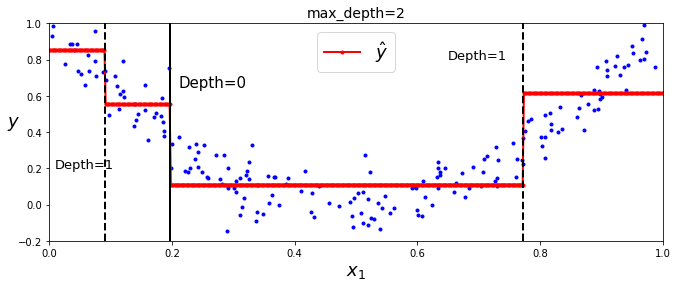

In [12]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plot_regression_predictions(tree_reg, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.show()

Alternatively, we can also export the decision tree using *export_graphviz*.

In [13]:
dot_data = export_graphviz(
        tree_reg,
        out_file=None,
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

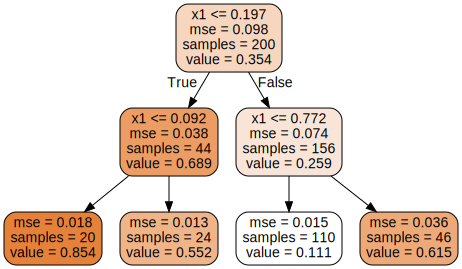

In [14]:
graph = graphviz.Source(dot_data)  
graph 

### I hope this notebook gives you a better sense of how decision tree works and how it is implemented using Scikit-Learn.